In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [6]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
print(df["Unnamed: 2"].isnull().sum())
print(df["Unnamed: 3"].isnull().sum())
print(df["Unnamed: 4"].isnull().sum())

5522
5560
5566


In [10]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.rename({"v1":"msg_type","v2":"msg"},axis=1,inplace=True)

In [13]:
df

,msg_type,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
le=LabelEncoder()

In [15]:
df['msg_type']=le.fit_transform(df['msg_type'])

In [16]:
df['msg_type'].value_counts()

0    4825
1     747
Name: msg_type, dtype: int64

In [17]:
df.duplicated().value_counts()

False    5169
True      403
dtype: int64

In [18]:
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
df['msg_type'].value_counts().values

array([4516,  653], dtype=int64)

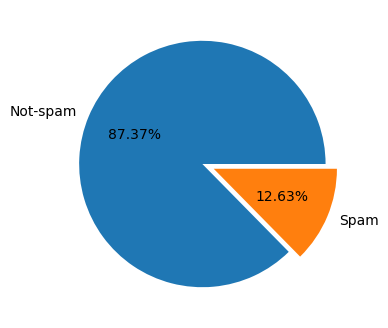

In [22]:
plt.figure(figsize=(6,4))
plt.pie(df["msg_type"].value_counts().values,autopct="%.02f%%",labels=["Not-spam","Spam"],explode=(0,0.1))

plt.show()

In [23]:
import nltk

In [25]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\purne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['msg'][1]

'Ok lar... Joking wif u oni...'

In [26]:
nltk.sent_tokenize(df['msg'][1])

['Ok lar...', 'Joking wif u oni...']

In [27]:
df["num_of_characters"]=df['msg'].apply(lambda x:len(x))
df["num_of_words"]=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
df["num_of_sen"]=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df

,msg_type,msg,num_of_characters,num_of_words,num_of_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<AxesSubplot:>

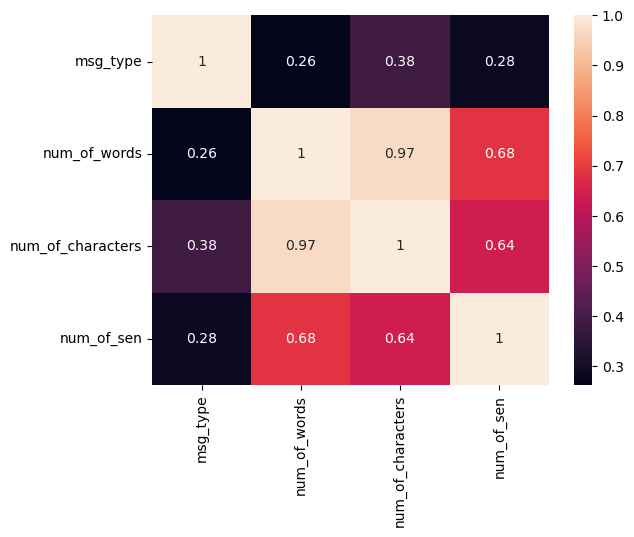

In [214]:
sns.heatmap(df.corr(),annot=True)

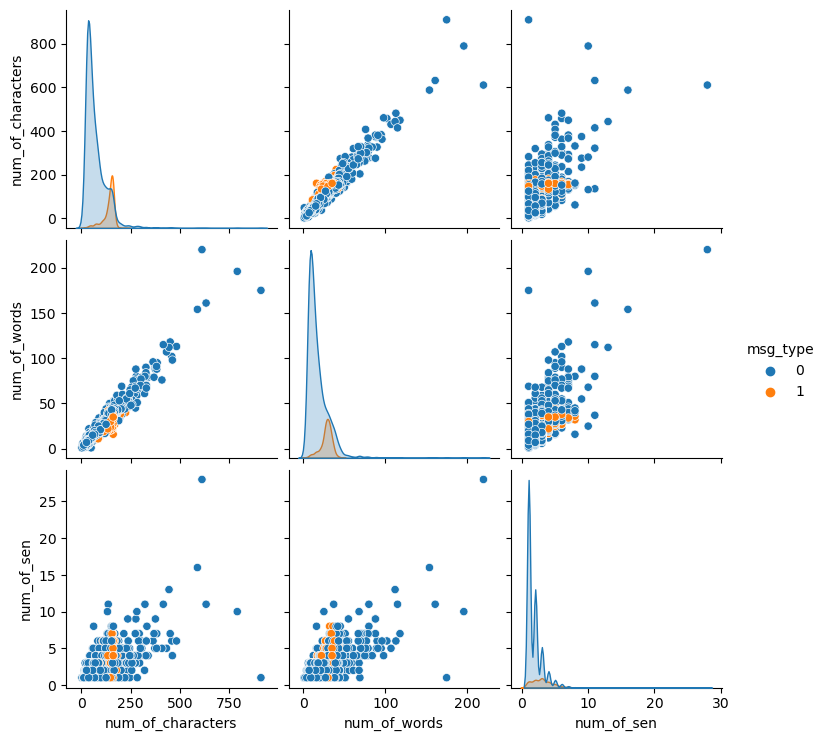

In [29]:
sns.pairplot(data=df,hue="msg_type")
plt.show()

In [218]:
df.describe()

,msg_type,num_of_words,num_of_characters,num_of_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,18.453279,78.977945,1.947185
std,0.332253,13.324793,58.236293,1.362406
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,9.000000,36.000000,1.000000
50%,0.000000,15.000000,60.000000,1.000000
75%,0.000000,26.000000,117.000000,2.000000
max,1.000000,220.000000,910.000000,28.000000


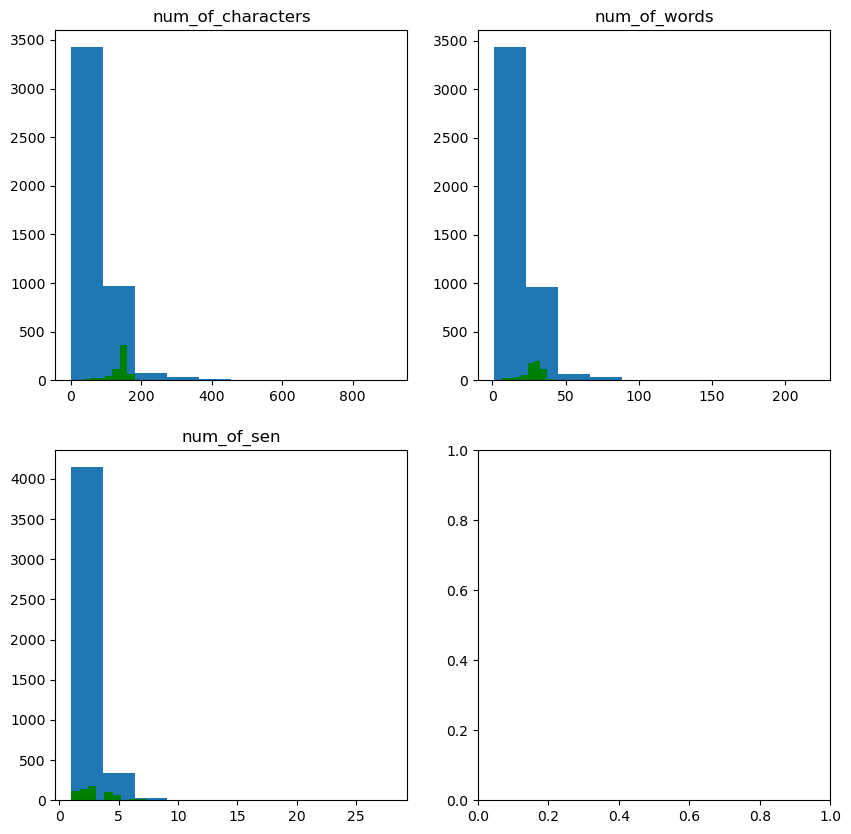

In [255]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,10),dpi=100)


axs[0,0].set_title("num_of_characters")
axs[0,0].hist(df[df["msg_type"] == 0]['num_of_characters'])
axs[0,0].hist(df[df["msg_type"] == 1]['num_of_characters'],color='green')

axs[0,1].set_title("num_of_words")
axs[0,1].hist(df[df["msg_type"] == 0]['num_of_words'])
axs[0,1].hist(df[df["msg_type"] == 1]['num_of_words'],color='green')

axs[1,0].set_title("num_of_sen")
axs[1,0].hist(df[df["msg_type"] == 0]['num_of_sen'])
axs[1,0].hist(df[df["msg_type"] == 1]['num_of_sen'],color='green')

plt.show()

In [37]:
ps=PorterStemmer()

In [124]:
def transform_msg(a):
    y=[]
    a=a.lower()
    a=nltk.word_tokenize(a)
    
    for i in a:
        if i.isalnum():
            y.append(i)
    a=y
    b=[]
    for i in a:
        if i not in stopwords.words("english"):
            b.append(i)
    a=b
    c=[]
    for i in a:
        c.append(ps.stem(i))
        
    return" ".join(c)

In [125]:
transform_msg("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
df["final_msg"]=df["msg"].apply(transform_msg)

In [50]:
df

,msg_type,msg,num_of_characters,num_of_words,num_of_sen,final_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [112]:
wc=WordCloud(height=500,width=500)

In [113]:
spammsg_wc=wc.generate(df[df["msg_type"] == 1]["final_msg"].str.cat(sep=" "))

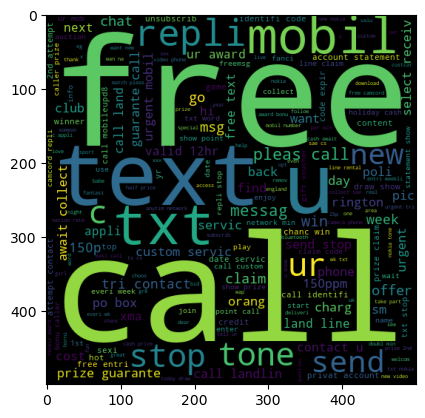

In [114]:
plt.imshow(spammsg_wc)

In [115]:
nospammsg_wc=wc.generate(df[df["msg_type"] == 0]["final_msg"].str.cat(sep=" "))

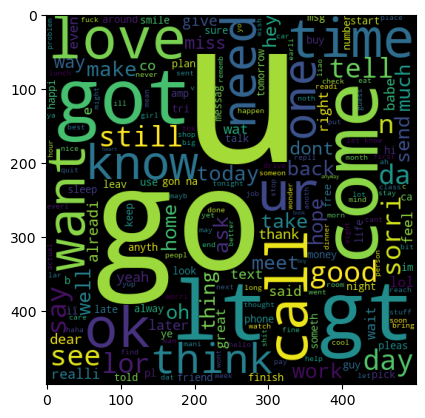

In [116]:
plt.imshow(nospammsg_wc)

In [221]:
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [222]:
x=tfidf.fit_transform(df["final_msg"]).toarray()

In [223]:
y=df["msg_type"]

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [210]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [179]:
mlp = MLPClassifier()
knc = KNeighborsClassifier()
svc= SVC()
gpc= GaussianProcessClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gnb= GaussianNB()
qda = QuadraticDiscriminantAnalysis()

In [180]:
clsf={"MLP":mlp,
      "KNC":knc,
      "SVC":svc,
      "GPC":gpc,
      "DTC":dtc,
      "RFC":rfc,
      "ABC":abc,
      "GNB":gnb
}

In [170]:
clsf.items()

dict_items([('MLP', MLPClassifier()), ('KNC', KNeighborsClassifier()), ('SVC', SVC()), ('GPC', GaussianProcessClassifier()), ('RBF', RBF(length_scale=1)), ('DTC', DecisionTreeClassifier()), ('RFC', RandomForestClassifier()), ('ABC', AdaBoostClassifier()), ('GNB', GaussianNB())])

In [175]:
def classifier(name,x_test,x_train,y_test,y_train):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    #confusion=confusion_matrix(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [176]:
classifier(svc,x_test,x_train,y_test,y_train)

(0.9777562862669246, 1.0)

In [182]:
acc=[]
pre=[]
for i ,j in clsf.items():
    accuracy,precision=classifier(j,x_test,x_train,y_test,y_train)
    print("Classifier Name - " ,i)
    print("Accuracy Score - ",accuracy)
    print("Precision Score - ",precision)
    acc.append(accuracy)
    pre.append(precision)
    

Classifier Name -  MLP
Accuracy Score -  0.9845261121856866
Precision Score -  0.9814814814814815
Classifier Name -  KNC
Accuracy Score -  0.9187620889748549
Precision Score -  1.0
Classifier Name -  SVC
Accuracy Score -  0.9777562862669246
Precision Score -  1.0
Classifier Name -  GPC
Accuracy Score -  0.9352030947775629
Precision Score -  0.9818181818181818
Classifier Name -  DTC
Accuracy Score -  0.9545454545454546
Precision Score -  0.8067226890756303
Classifier Name -  RFC
Accuracy Score -  0.9729206963249516
Precision Score -  0.9893617021276596
Classifier Name -  ABC
Accuracy Score -  0.9642166344294004
Precision Score -  0.8807339449541285
Classifier Name -  GNB
Accuracy Score -  0.8646034816247582
Precision Score -  0.45652173913043476


In [ ]:
acc

In [ ]:
pre

In [191]:
final_score=pd.DataFrame({"Classifier":clsf.keys(),"Accuracy_Score":acc,"Precision_Score":pre}).sort_values(by="Precision_Score",ascending=False)

In [192]:
final_score

,Classifier,Accuracy_Score,Precision_Score
1,KNC,0.918762,1.000000
2,SVC,0.977756,1.000000
5,RFC,0.972921,0.989362
3,GPC,0.935203,0.981818
0,MLP,0.984526,0.981481
6,ABC,0.964217,0.880734
4,DTC,0.954545,0.806723
7,GNB,0.864603,0.456522


In [201]:
x=cv.fit_transform(df["final_msg"]).toarray()

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [207]:
acc2=[]
pre2=[]
for i ,j in clsf.items():
    accuracy,precision=classifier(j,x_test,x_train,y_test,y_train)
    print("Classifier Name - " ,i)
    print("Accuracy Score - ",accuracy)
    print("Precision Score - ",precision)
    acc2.append(accuracy)
    pre2.append(precision)
 

Classifier Name -  MLP
Accuracy Score -  0.9787234042553191
Precision Score -  0.9736842105263158
Classifier Name -  KNC
Accuracy Score -  0.9129593810444874
Precision Score -  1.0
Classifier Name -  SVC
Accuracy Score -  0.9729206963249516
Precision Score -  1.0
Classifier Name -  GPC
Accuracy Score -  0.9274661508704062
Precision Score -  1.0
Classifier Name -  DTC
Accuracy Score -  0.9680851063829787
Precision Score -  0.9369369369369369
Classifier Name -  RFC
Accuracy Score -  0.9671179883945842
Precision Score -  1.0
Classifier Name -  ABC
Accuracy Score -  0.9642166344294004
Precision Score -  0.9345794392523364
Classifier Name -  GNB
Accuracy Score -  0.8704061895551257
Precision Score -  0.49107142857142855


In [208]:
final_score["Accuracy_Score_in_CountVectorizer"]=acc2
final_score["Precision_Score_in_CountVectorizer"]=pre2

In [209]:
final_score.sort_values(by="Precision_Score",ascending=False)

,Classifier,Accuracy_Score,Precision_Score,Accuracy_Score_in_CountVectorizer,Precision_Score_in_CountVectorizer
1,KNC,0.918762,1.000000,0.978723,0.973684
2,SVC,0.977756,1.000000,0.912959,1.000000
5,RFC,0.972921,0.989362,0.972921,1.000000
3,GPC,0.935203,0.981818,0.927466,1.000000
0,MLP,0.984526,0.981481,0.968085,0.936937
6,ABC,0.964217,0.880734,0.967118,1.000000
4,DTC,0.954545,0.806723,0.964217,0.934579
7,GNB,0.864603,0.456522,0.870406,0.491071


In [216]:
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[904   0]
 [ 28 102]]
1.0


In [225]:
import pickle
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))

In [238]:
import pickle
pickle.dump(mnb,open('model1.pkl','wb'))

In [1]:
pip install streamlit

  Using cached streamlit-1.21.0-py2.py3-none-any.whl (9.7 MB)
  Using cached blinker-1.6.1-py3-none-any.whl (13 kB)
  Using cached validators-0.20.0-py3-none-any.whl
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached tzlocal-4.3-py3-none-any.whl (20 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached rich-13.3.3-py3-none-any.whl (238 kB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached pyarrow-11.0.0-cp39-cp39-win_amd64.whl (20.6 MB)
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Using cached Pygments-2.15.0-py3-none-any.whl (1.1 MB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using ca

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [2]:
streamlit hello

SyntaxError: invalid syntax (2773187961.py, line 1)